In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
with open('lines_x.pkl', 'rb') as file:
    lines_x = np.array(pickle.load(file))
with open('lines_y.pkl', 'rb') as file:
    lines_y = np.array(pickle.load(file))
with open('x_sim.pkl', 'rb') as file:
    x_sim = pickle.load(file)
with open('bead_data.pkl', 'rb') as file:
    bead_y = pickle.load(file)
with open('distances.pkl', 'rb') as file:
    distances = pickle.load(file)
with open('vel_profile.pkl', 'rb') as file:
    velocities = pickle.load(file)

In [52]:
print(lines_x[:,0])

[1.04523322008718 4.42300587208565 7.89935811503641 11.4612817785794
 15.1297731254055 18.8892335908949 22.7635375445190 26.7338964725062
 30.8274114546739 35.0213747892303 39.3429057905620 43.7893656549242
 48.3479309481281 53.0566112559044 57.8796725062374 62.8546947214975
 67.9692230249509 73.2409372202076 78.6462447915741 84.2431160929865
 89.9699543870582 95.8745713313566]


[[1.04523322008718 3.06307234339377]
 [1.16386926118994 1.49562307266877]]
[[4.42300587208565 6.49769500768751]
 [1.19056247078484 1.53061448735122]]
[[7.89935811503641 10.0281443635448]
 [1.21693690747435 1.56303441349566]]
[[11.4612817785794 13.6505214643134]
 [1.24449020852632 1.60027717305363]]
[[15.1297731254055 17.3768030610344]
 [1.27249557757808 1.63452758903022]]
[[18.8892335908949 21.2011151505656]
 [1.30171714336243 1.67414570393986]]
[[22.7635375445190 25.1367929580515]
 [1.33129966546214 1.71009814877045]]
[[26.7338964725062 29.1763217675158]
 [1.36210328286762 1.75200126575654]]
[[30.8274114546739 33.3344650916620]
 [1.39311773725322 1.78939741716602]]
[[35.0213747892303 37.6015883014647]
 [1.42530921794551 1.83335228299350]]
[[39.3429057905620 41.9972050790478]
 [1.45956674424792 1.87643847508193]]
[[43.7893656549242 46.5149279958377]
 [1.49251408750201 1.91758681389718]]
[[48.3479309481281 51.1566033894159]
 [1.52841324105928 1.96689048946853]]
[[53.0566112559044 55.940

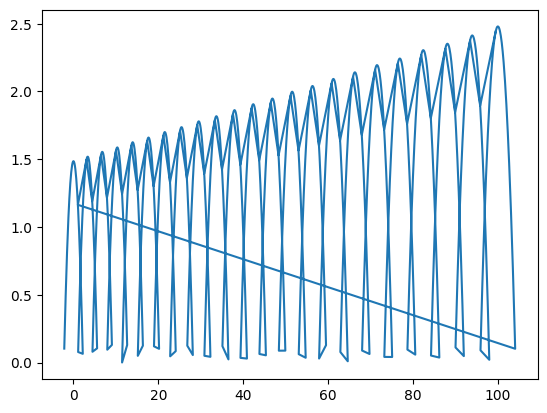

In [62]:
fig, ax = plt.subplots(1,1)
data_all = np.empty((2,0))
for bead in bead_y:
    data = np.empty((2,0))
    for idx, y in enumerate(bead):
        if y >= 0:
            data = np.concatenate((data, np.array([[x_sim[idx]],[y]])),1)
    #data_sorted_idx = np.lexsort((data[0,:],data[1,:]))
    #data_sorted = data[:,data_sorted_idx]
    data_all = np.concatenate((data_all,data),1)

for idx, pair in enumerate(lines_x):
    data = np.array((lines_x[idx,:],lines_y[idx,:]))
    data_all = np.concatenate((data_all, data),1)

ax.plot(data_all[0], data_all[1])
plt.show()

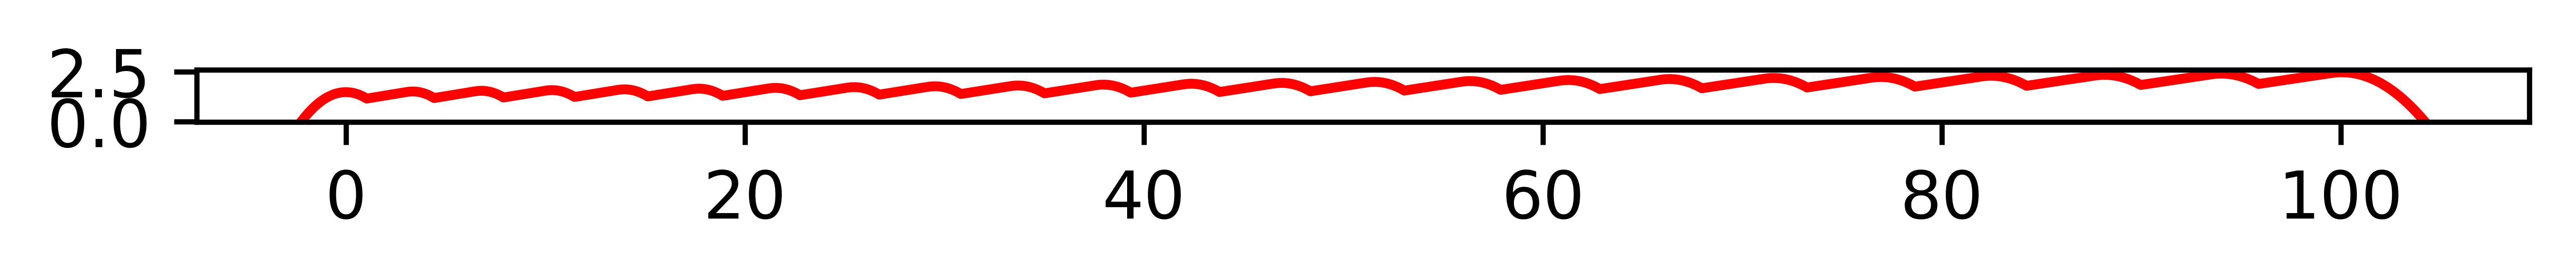

In [141]:
data_filtered = np.empty((2,0))
for idx,x in enumerate(data_all[0,:]):
    #if x is already in data_filtered, skip
    
    if x not in data_filtered[0,:]:
        like_idx = []
        for idx_loc, val in enumerate(data_all[0,:]):
            if x == val:
                like_idx.append(idx_loc)
                #print(idx_loc)
        data_sorted = np.sort(data_all[1,like_idx])
        data = np.array(([x],[data_sorted[-1]]))
        data_filtered = np.concatenate((data_filtered, data),1)

# window out where lines are
data_further_filtered = np.empty((2,0))
range_idx = 0
idx_lim = len(lines_x)
for idx, x in enumerate(data_filtered[0,:]):
    if range_idx>=idx_lim:
        data = np.array((data_filtered[0,idx:],data_filtered[1,idx:]))
        data_further_filtered = np.concatenate((data_further_filtered, data),1)
        break

    x_range = lines_x[range_idx]

    if x < x_range[0]:
        data = np.array(([x],[data_filtered[1,idx]]))
        data_further_filtered = np.concatenate((data_further_filtered, data),1)
    elif x >= x_range[1]:
        range_idx +=1
    

sorted_idx = np.argsort((data_further_filtered[0,:]))

data_sorted = data_further_filtered[:,sorted_idx]

fig, ax = plt.subplots(1,1)
ax.plot(data_sorted[0,:], data_sorted[1,:], 'r', )
#fig.set_figheight(100)
ax.set_aspect('equal')
fig.set_dpi(1200)
plt.show()

In [3]:
print(distances)

[3.3506586911179363, 3.443325777064958, 3.536873868015687, 3.632603694892101, 3.732987236077142, 3.83538701044289, 3.9425912395380402, 4.051462711092038, 4.165147171067131, 4.279887680714889, 4.405331639829793, 4.526795657829735, 4.656432552750956, 4.791016823119749, 4.924764274118759, 5.071573489453272, 5.219151047825186, 5.368696014860956, 5.528213767406903, 5.691977287974608, 5.850175692070744, 6.039455029968126]
